# Main Library

In [2]:
# Reading Data & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing & Encoder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# Building Model 
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# Building Neural Network
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import tensorflow.keras as k

# Reading Data

In [3]:
train = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Predict Health Outcomes of Horses\train.csv")
test = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Predict Health Outcomes of Horses\test.csv")

test_id = test["id"]

In [4]:
train.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
test.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [6]:
train.shape

(1235, 29)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [8]:
train.isnull().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [9]:
train["outcome"].value_counts()

lived         574
died          410
euthanized    251
Name: outcome, dtype: int64

# Make Filling Data

In [10]:
def filling_Data(data):
    for col in data.columns:
        if data[col].dtype == "O":
            data[col].fillna(data[col].value_counts().index[0], inplace=True)
        else:
            data[col].fillna(data[col].median(), inplace=True)
    return data
            
train = filling_Data(train)
test = filling_Data(test)

In [11]:
test.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


# Make Drop Some Columns

In [12]:
def drop_col(data):
    data.drop(columns="id", axis=1, inplace=True)
#     data.drop(columns="lesion_2", axis=1, inplace=True)
#     data.drop(columns="lesion_3", axis=1, inplace=True)
    data.drop(columns="hospital_number", axis=1, inplace=True)
    return data


train = drop_col(train)
test = drop_col(test)

train.head(3)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived


# Make Label Encoder For Data

In [13]:
def Lab_Enc(data):
    la = LabelEncoder()
    data_obj = data.select_dtypes(include=["object"])
    for col in data_obj.columns:
        data[col] = la.fit_transform(data[col])
    return data

train = Lab_Enc(train)
test = Lab_Enc(test)

train.head(3)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1,0,38.1,132.0,24.0,2,4,3,3,2,...,57.0,8.5,3,3.4,1,2209,0,0,0,0
1,1,0,37.5,88.0,12.0,2,3,5,3,4,...,33.0,64.0,3,2.0,1,2208,0,0,0,1
2,1,0,38.3,120.0,28.0,2,4,6,2,3,...,37.0,6.4,3,3.4,1,5124,0,0,0,2


# Make Some Visualization

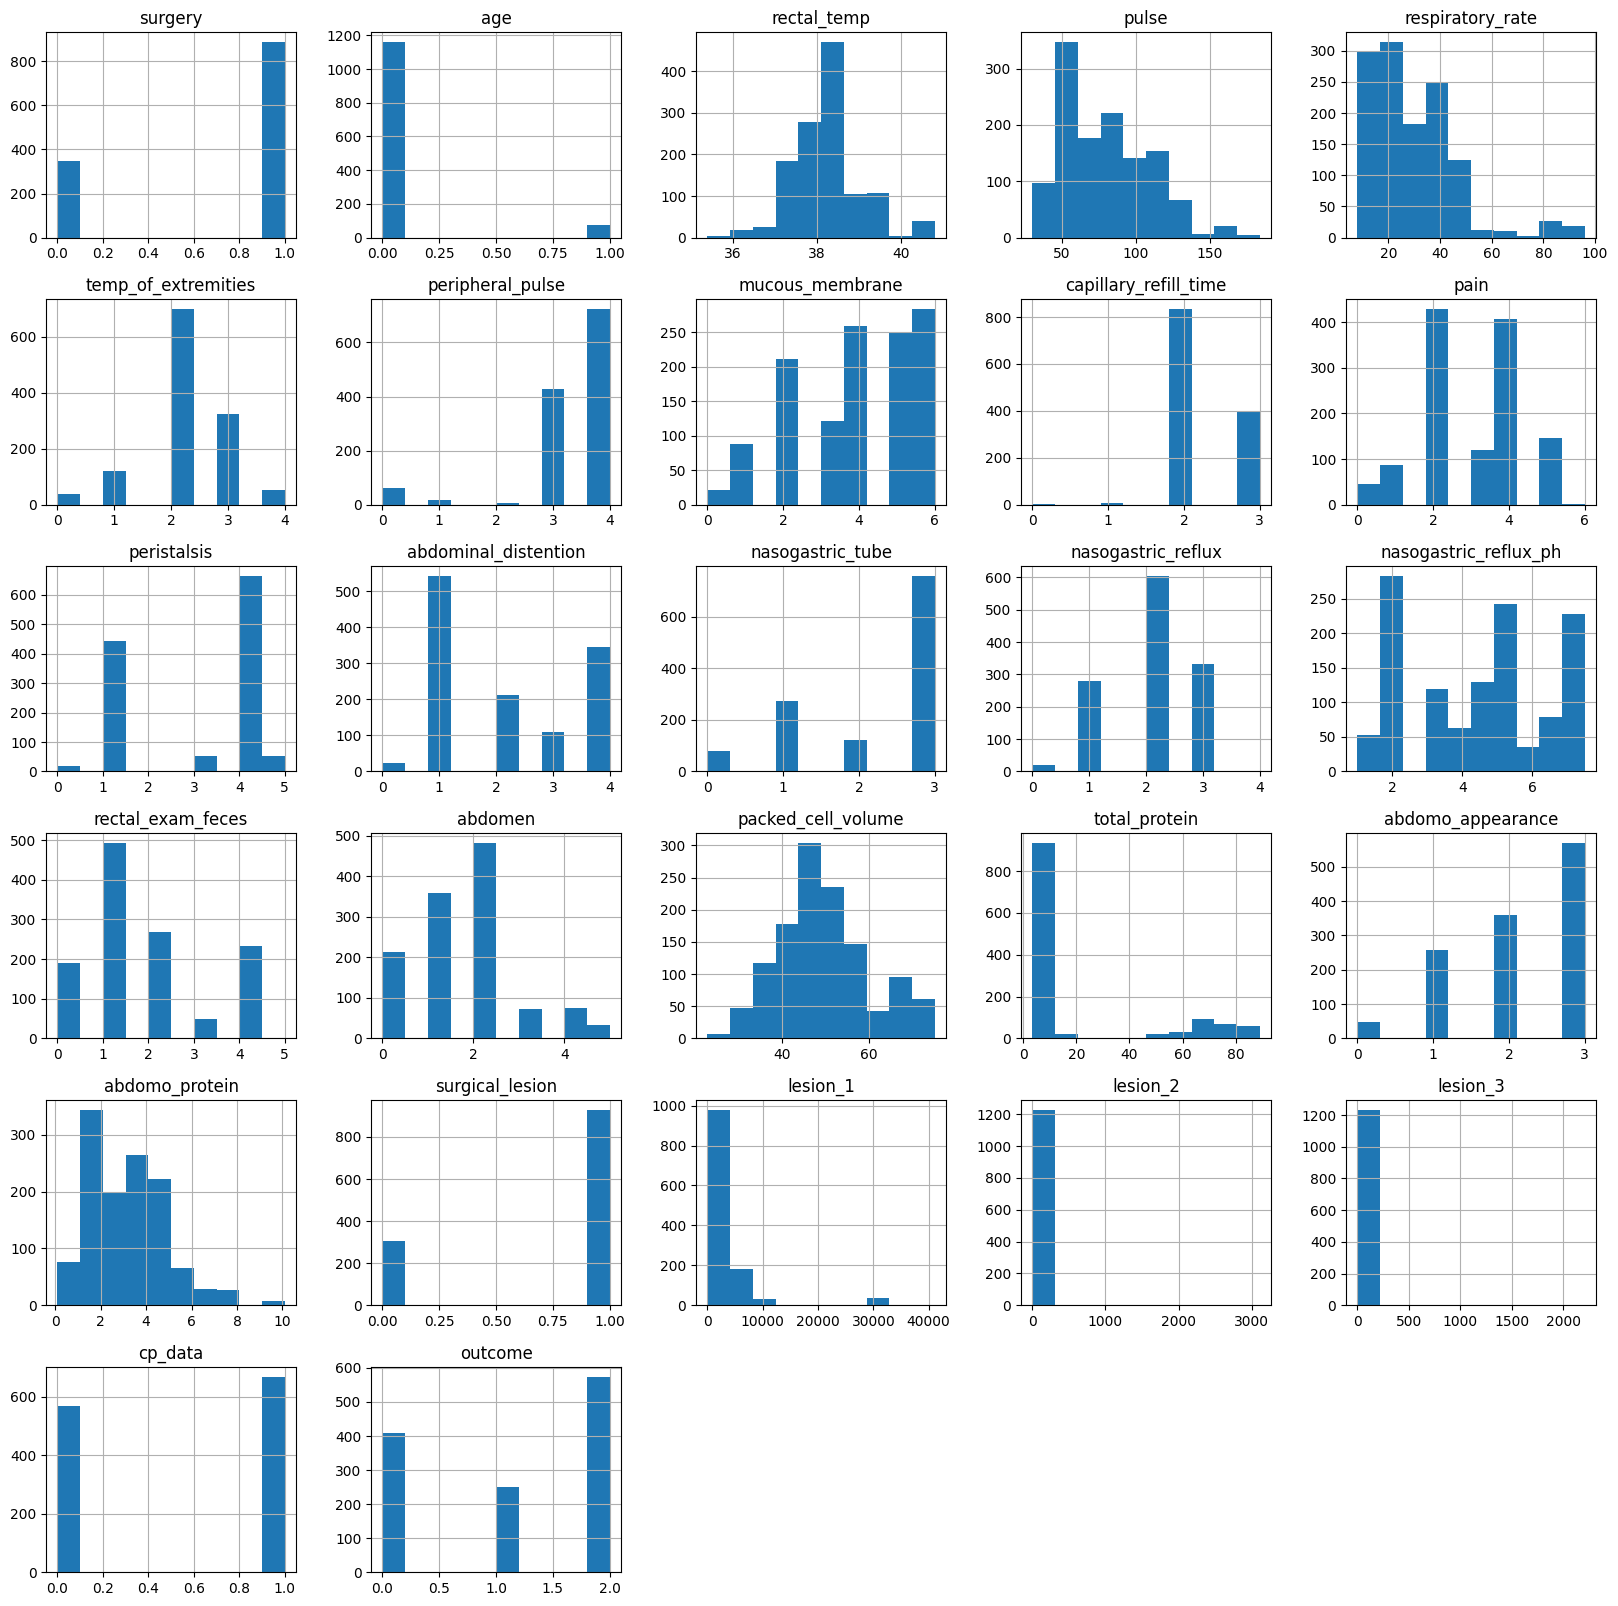

In [14]:
train.hist(figsize=(20, 20));

# Make Log Transforme

In [15]:
def log_transform(data):
    for col in ["respiratory_rate", "total_protein"]:
        median = data[col].median()
        data[col] = np.log(data[col])
        data[col] = data[col].replace([-np.inf, np.inf], median)
    return data

train = log_transform(train)
test = log_transform(test)
train.head(3)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1,0,38.1,132.0,3.178054,2,4,3,3,2,...,57.0,2.140066,3,3.4,1,2209,0,0,0,0
1,1,0,37.5,88.0,2.484907,2,3,5,3,4,...,33.0,4.158883,3,2.0,1,2208,0,0,0,1
2,1,0,38.3,120.0,3.332205,2,4,6,2,3,...,37.0,1.856298,3,3.4,1,5124,0,0,0,2


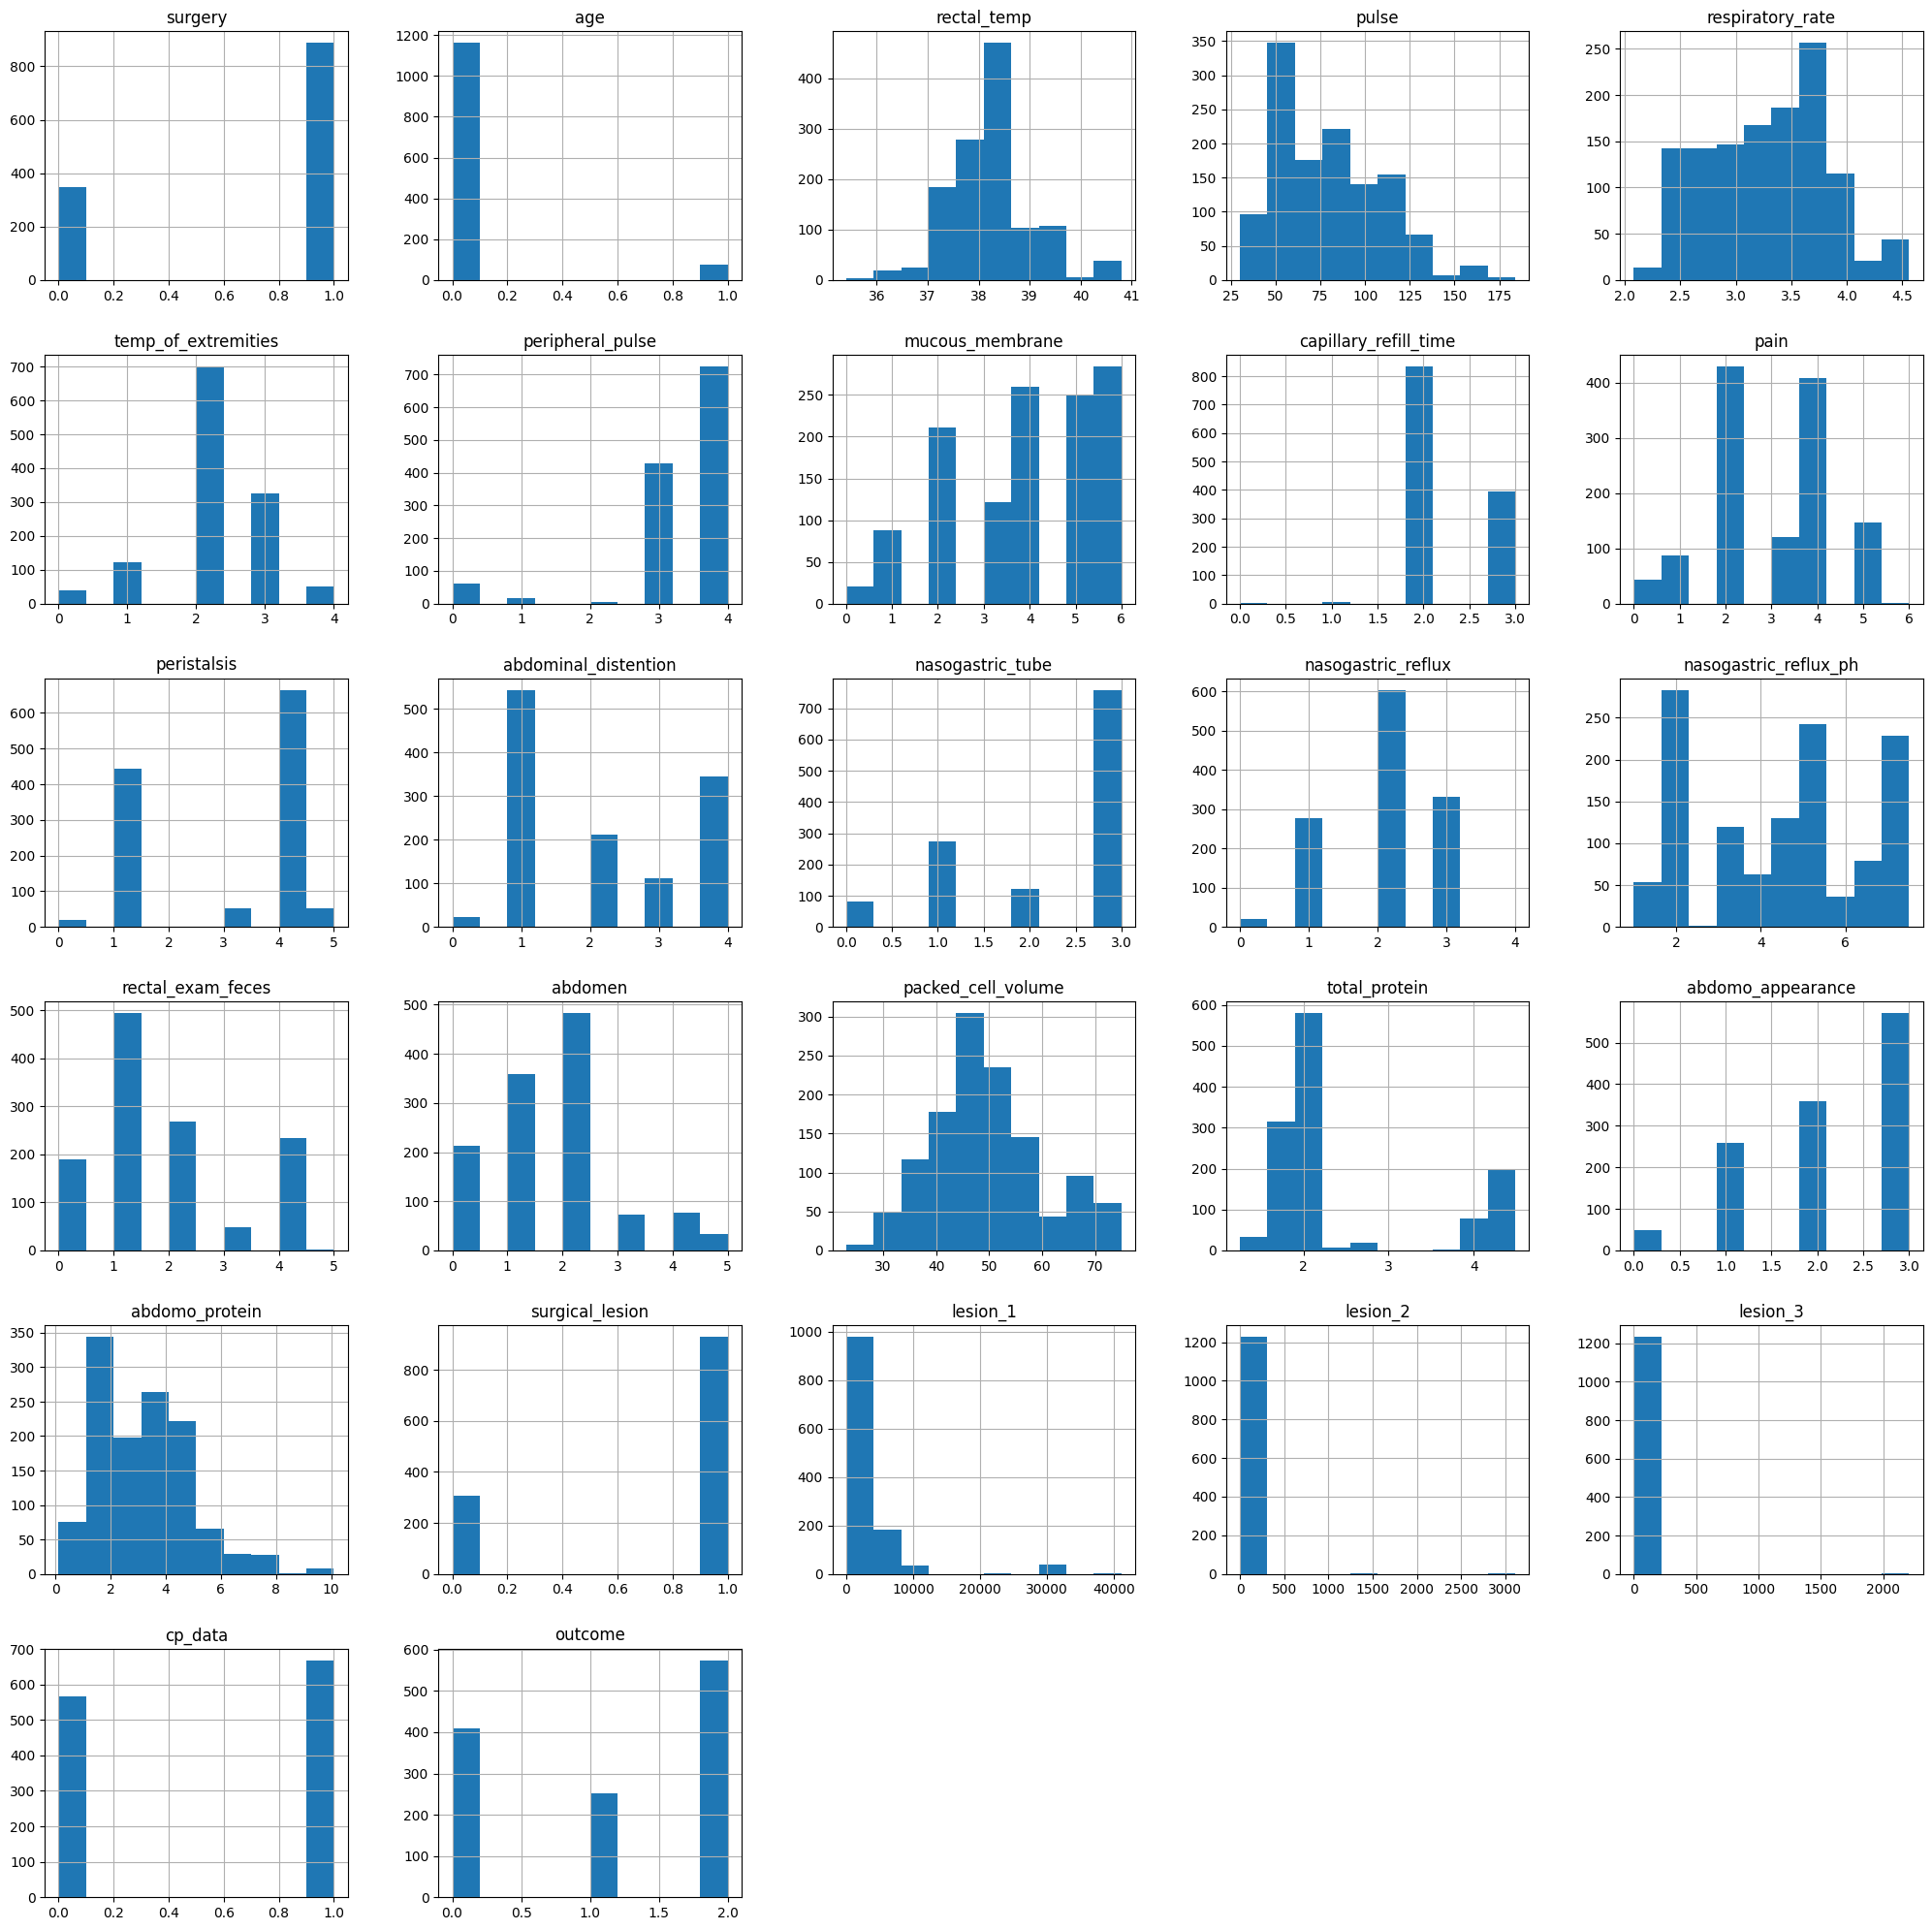

In [16]:
train.hist(figsize=(25, 25));

# Make Over Smapling For Training Data

In [17]:
X_input = train.drop(columns="outcome", axis=1)
Y_output = train["outcome"]

print(train["outcome"].value_counts())

new_x, new_y =  SMOTE().fit_resample(X_input, Y_output)

train = pd.concat([new_x, new_y], axis=1)

print(train["outcome"].value_counts())

2    574
0    410
1    251
Name: outcome, dtype: int64
0    574
1    574
2    574
Name: outcome, dtype: int64


# Splitting Data

In [18]:
X = train.drop(columns="outcome", axis=1)
Y = train["outcome"]

x_train, x_test, y_train, y_test  = train_test_split(X, Y, train_size=0.7, random_state=42)

## Make Over Sampling For Training Data

In [19]:
y_train.value_counts()

0    408
1    404
2    393
Name: outcome, dtype: int64

In [20]:
X_input1 = x_train
Y_output1 = y_train

print(Y_output1.value_counts())

x_train, y_train =  SMOTE().fit_resample(X_input1, Y_output1)

print(y_train.value_counts())

0    408
1    404
2    393
Name: outcome, dtype: int64
1    408
0    408
2    408
Name: outcome, dtype: int64


# Building Model

## 1 - SGD Classifiar

In [23]:
model = SGDClassifier(penalty="l1")
model.fit(x_train, y_train)

print(f"The accuracy_score of training is ==> {model.score(x_train, y_train)}")
print(f"The accuracy_score of testing is ==> {model.score(x_test, y_test)}")

The accuracy_score of training is ==> 0.41748366013071897
The accuracy_score of testing is ==> 0.41392649903288203


## 2 - RandomForestClassifier

In [31]:
model_RF = RandomForestClassifier(max_depth=150, n_estimators=100)
model_RF.fit(x_train, y_train)

print(f"The Accuracy SCore Train is {model_RF.score(x_train, y_train)}")
print(f"The Accuracy SCore Test is {model_RF.score(x_test, y_test)}")

The Accuracy SCore Train is 1.0
The Accuracy SCore Test is 0.758220502901354


In [32]:
# param = {"n_estimators": np.arange(100, 500, 100),
#          "max_depth": np.arange(5, 50, 5),
#          "min_samples_split": np.arange(1,4), 
#          "max_features": ["auto", "log2", "sqrt"]}

# new_model_random = GridSearchCV(estimator=RandomForestClassifier(), 
#                                param_grid=param,
#                                verbose=6,
#                                cv=5,
#                                n_jobs=-1)

# new_model_random.fit(x_train, y_train)

# print(f"The Accuracy SCore Train is {new_model_random.score(x_train, y_train)}")
# print(f"The Accuracy SCore Test is {new_model_random.score(x_test, y_test)}")

In [ ]:
new_model_random.best_params_, new_model_random.best_score_

## 3 - AdaBoostClassifier

In [34]:
model_AD = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1000, 
                                                                min_samples_split=5,
                                                                min_samples_leaf=3),
                              n_estimators=200,
                              learning_rate=0.01)


model_AD.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD.score(x_test, y_test)}")

The predict Score Train is ==> 1.0
%----------------------------------------------------------%
The predict Score Test is ==> 0.7949709864603481


## 4 - XGBClassifier

In [41]:
model_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=150,
                              max_leaves=5,
                              learning_rate=0.1,
                             )

model_xgb.fit(X, Y)


print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.9959150326797386
%----------------------------------------------------------%
The predict Score Test is ==> 1.0


In [ ]:
param = {"n_estimators": np.arange(100, 500, 100),
         "max_depth": np.arange(10, 100, 10),
         "max_leaves": [1, 2, 3, 4, 5]}

new_model_xgb = GridSearchCV(estimator=xgb.XGBClassifier(), 
                               param_grid=param,
                               verbose=6,
                               cv=5,
                               n_jobs=-1)

new_model_xgb.fit(x_train, y_train)

print(f"The Accuracy SCore Train is {new_model_xgb.score(x_train, y_train)}")
print(f"The Accuracy SCore Test is {new_model_xgb.score(x_test, y_test)}")

In [ ]:
new_model_xgb.best_params_, new_model_xgb.best_score_

# Model 5 - AutoML

In [53]:
from flaml import AutoML

automl = AutoML()
automl.fit(X, Y, task="multiclass", time_budget=500, n_jobs=-1)

print(f"The Accuracy SCore Train is {automl.score(x_train, y_train)}")
print(f"The Accuracy SCore Test is {automl.score(x_test, y_test)}")

[flaml.automl.logger: 09-23 05:14:58] {1679} INFO - task = multiclass
[flaml.automl.logger: 09-23 05:14:58] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 09-23 05:14:58] {1788} INFO - Minimizing error metric: log_loss
[flaml.automl.logger: 09-23 05:14:58] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 09-23 05:14:58] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 09-23 05:14:58] {2344} INFO - Estimated sufficient time budget=390s. Estimated necessary time budget=10s.
[flaml.automl.logger: 09-23 05:14:58] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.9352,	best estimator lgbm's best error=0.9352
[flaml.automl.logger: 09-23 05:14:58] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-23 05:14:58] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.9352,	best estimator lgbm's best error=0.9352
[flaml.automl.logger: 09-23 0

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:14:58] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.6291,	best estimator lgbm's best error=0.6291
[flaml.automl.logger: 09-23 05:14:58] {2218} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 09-23 05:14:58] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.6291,	best estimator lgbm's best error=0.6291
[flaml.automl.logger: 09-23 05:14:58] {2218} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 09-23 05:14:58] {2391} INFO -  at 0.4s,	estimator lgbm's best error=0.6291,	best estimator lgbm's best error=0.6291
[flaml.automl.logger: 09-23 05:14:58] {2218} INFO - iteration 9, current learner lgbm
[flaml.automl.logger: 09-23 05:14:58] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.6095,	best estimator lgbm's best error=0.6095
[flaml.automl.logger: 09-23 05:14:58] {2218} INFO - iteration 10, current learner xgboost
[flaml.automl.logger: 09-23 05:14:58] {2391} INFO -  at 0.6s,	estimator xgboost's best error=0.9672,

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:14:58] {2218} INFO - iteration 12, current learner rf
[flaml.automl.logger: 09-23 05:14:59] {2391} INFO -  at 0.8s,	estimator rf's best error=0.8578,	best estimator lgbm's best error=0.6095
[flaml.automl.logger: 09-23 05:14:59] {2218} INFO - iteration 13, current learner xgboost
[flaml.automl.logger: 09-23 05:14:59] {2391} INFO -  at 0.9s,	estimator xgboost's best error=0.8514,	best estimator lgbm's best error=0.6095
[flaml.automl.logger: 09-23 05:14:59] {2218} INFO - iteration 14, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:14:59] {2391} INFO -  at 1.1s,	estimator rf's best error=0.8035,	best estimator lgbm's best error=0.6095
[flaml.automl.logger: 09-23 05:14:59] {2218} INFO - iteration 15, current learner extra_tree
[flaml.automl.logger: 09-23 05:14:59] {2391} INFO -  at 1.2s,	estimator extra_tree's best error=0.8402,	best estimator lgbm's best error=0.6095
[flaml.automl.logger: 09-23 05:14:59] {2218} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 09-23 05:14:59] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.6095,	best estimator lgbm's best error=0.6095
[flaml.automl.logger: 09-23 05:14:59] {2218} INFO - iteration 17, current learner extra_tree
[flaml.automl.logger: 09-23 05:14:59] {2391} INFO -  at 1.4s,	estimator extra_tree's best error=0.8402,	best estimator lgbm's best error=0.6095
[flaml.automl.logger: 09-23 05:14:59] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 09-23 05:14:59] {2391} INFO -  at 1.6s,	estimator lgbm's

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:03] {2391} INFO -  at 5.0s,	estimator extra_tree's best error=0.8402,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:03] {2218} INFO - iteration 27, current learner xgboost
[flaml.automl.logger: 09-23 05:15:03] {2391} INFO -  at 5.1s,	estimator xgboost's best error=0.6973,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:03] {2218} INFO - iteration 28, current learner xgboost
[flaml.automl.logger: 09-23 05:15:03] {2391} INFO -  at 5.1s,	estimator xgboost's best error=0.6973,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:03] {2218} INFO - iteration 29, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:03] {2391} INFO -  at 5.2s,	estimator xgboost's best error=0.6468,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:03] {2218} INFO - iteration 30, current learner xgboost
[flaml.automl.logger: 09-23 05:15:03] {2391} INFO -  at 5.3s,	estimator xgboost's best error=0.6128,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:03] {2218} INFO - iteration 31, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:03] {2391} INFO -  at 5.8s,	estimator lgbm's best error=0.5552,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:03] {2218} INFO - iteration 32, current learner lgbm
[flaml.automl.logger: 09-23 05:15:04] {2391} INFO -  at 6.0s,	estimator lgbm's best error=0.5552,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:04] {2218} INFO - iteration 33, current learner lgbm
[flaml.automl.logger: 09-23 05:15:04] {2391} INFO -  at 6.4s,	estimator lgbm's best error=0.5552,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:04] {2218} INFO - iteration 34, current learner xgboost
[flaml.automl.logger: 09-23 05:15:04] {2391} INFO -  at 6.4s,	estimator xgboost's best error=0.6128,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:04] {2218} INFO - iteration 35, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:04] {2391} INFO -  at 6.6s,	estimator lgbm's best error=0.5552,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:04] {2218} INFO - iteration 36, current learner catboost
[flaml.automl.logger: 09-23 05:15:07] {2391} INFO -  at 9.5s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:07] {2218} INFO - iteration 37, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:07] {2391} INFO -  at 9.7s,	estimator extra_tree's best error=0.8093,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:07] {2218} INFO - iteration 38, current learner xgboost
[flaml.automl.logger: 09-23 05:15:07] {2391} INFO -  at 9.8s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:07] {2218} INFO - iteration 39, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:08] {2391} INFO -  at 9.9s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:08] {2218} INFO - iteration 40, current learner rf
[flaml.automl.logger: 09-23 05:15:08] {2391} INFO -  at 10.1s,	estimator rf's best error=0.8035,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:08] {2218} INFO - iteration 41, current learner xgboost
[flaml.automl.logger: 09-23 05:15:08] {2391} INFO -  at 10.2s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:08] {2218} INFO - iteration 42, current learner xgboost
[flaml.automl.logger: 09-23 05:15:08] {2391} INFO -  at 10.3s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:08] {2218} INFO - iteration 43, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:08] {2391} INFO -  at 10.4s,	estimator lgbm's best error=0.5552,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:08] {2218} INFO - iteration 44, current learner xgboost
[flaml.automl.logger: 09-23 05:15:08] {2391} INFO -  at 10.5s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:08] {2218} INFO - iteration 45, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:08] {2391} INFO -  at 10.7s,	estimator extra_tree's best error=0.8093,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:08] {2218} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 09-23 05:15:09] {2391} INFO -  at 10.9s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:09] {2218} INFO - iteration 47, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:09] {2391} INFO -  at 11.5s,	estimator lgbm's best error=0.5552,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:09] {2218} INFO - iteration 48, current learner xgboost
[flaml.automl.logger: 09-23 05:15:09] {2391} INFO -  at 11.6s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5552
[flaml.automl.logger: 09-23 05:15:09] {2218} INFO - iteration 49, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:10] {2391} INFO -  at 11.9s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:10] {2218} INFO - iteration 50, current learner rf
[flaml.automl.logger: 09-23 05:15:10] {2391} INFO -  at 12.1s,	estimator rf's best error=0.7712,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:10] {2218} INFO - iteration 51, current learner xgboost
[flaml.automl.logger: 09-23 05:15:10] {2391} INFO -  at 12.2s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:10] {2218} INFO - iteration 52, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:10] {2391} INFO -  at 12.5s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:10] {2218} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 09-23 05:15:10] {2391} INFO -  at 12.8s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:10] {2218} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 09-23 05:15:11] {2391} INFO -  at 13.2s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:11] {2218} INFO - iteration 55, current learner lgbm
[flaml.automl.logger: 09-23 05:15:11] {2391} INFO -  at 13.7s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:11] {2218} INFO - iteration 56, current learner catboost
[flaml.automl.logger: 09-23 05:15:13] {2391} INFO -  at 14.9s,	estimator catboost's best err

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:17] {2391} INFO -  at 19.0s,	estimator xgb_limitdepth's best error=0.6175,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:17] {2218} INFO - iteration 63, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:17] {2391} INFO -  at 19.2s,	estimator xgb_limitdepth's best error=0.6175,	best estimator lgbm's best error=0.5447


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:17] {2218} INFO - iteration 64, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:17] {2391} INFO -  at 19.3s,	estimator xgb_limitdepth's best error=0.6103,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:17] {2218} INFO - iteration 65, current learner xgboost
[flaml.automl.logger: 09-23 05:15:17] {2391} INFO -  at 19.4s,	estimator xgboost's best error=0.5890,	best estimator lgbm's best error=0.5447


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:17] {2218} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 09-23 05:15:17] {2391} INFO -  at 19.5s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:17] {2218} INFO - iteration 67, current learner rf
[flaml.automl.logger: 09-23 05:15:17] {2391} INFO -  at 19.8s,	estimator rf's best error=0.7712,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:17] {2218} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 09-23 05:15:18] {2391} INFO -  at 19.9s,	estimator xgboost's best error=0.5788,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:18] {2218} INFO - iteration 69, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:18] {2391} INFO -  at 20.1s,	estimator rf's best error=0.7546,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:18] {2218} INFO - iteration 70, current learner lgbm
[flaml.automl.logger: 09-23 05:15:18] {2391} INFO -  at 20.6s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:18] {2218} INFO - iteration 71, current learner catboost
[flaml.automl.logger: 09-23 05:15:19] {2391} INFO -  at 21.6s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:19] {2218} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 09-23 05:15:19] {2391} INFO -  at 21.8s,	estimator xgboost's best error=0.5788,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:19] {2218} INFO - iteration 73, current learner catboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:22] {2391} INFO -  at 24.2s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:22] {2218} INFO - iteration 74, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:22] {2391} INFO -  at 24.3s,	estimator xgb_limitdepth's best error=0.6103,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:22] {2218} INFO - iteration 75, current learner catboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:24] {2391} INFO -  at 26.0s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:24] {2218} INFO - iteration 76, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:24] {2391} INFO -  at 26.1s,	estimator xgb_limitdepth's best error=0.6103,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:24] {2218} INFO - iteration 77, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:24] {2391} INFO -  at 26.3s,	estimator lgbm's best error=0.5447,	best estimator lgbm's best error=0.5447
[flaml.automl.logger: 09-23 05:15:24] {2218} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 09-23 05:15:24] {2391} INFO -  at 26.7s,	estimator lgbm's best error=0.5441,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:24] {2218} INFO - iteration 79, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:24] {2391} INFO -  at 26.8s,	estimator extra_tree's best error=0.7871,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:24] {2218} INFO - iteration 80, current learner rf
[flaml.automl.logger: 09-23 05:15:25] {2391} INFO -  at 27.0s,	estimator rf's best error=0.7204,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:25] {2218} INFO - iteration 81, current learner lgbm
[flaml.automl.logger: 09-23 05:15:25] {2391} INFO -  at 27.4s,	estimator lgbm's best err

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:25] {2391} INFO -  at 27.8s,	estimator rf's best error=0.7204,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:25] {2218} INFO - iteration 84, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:26] {2391} INFO -  at 27.9s,	estimator xgb_limitdepth's best error=0.5965,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:26] {2218} INFO - iteration 85, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:26] {2391} INFO -  at 28.2s,	estimator extra_tree's best error=0.7708,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:26] {2218} INFO - iteration 86, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:26] {2391} INFO -  at 28.3s,	estimator xgb_limitdepth's best error=0.5965,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:26] {2218} INFO - iteration 87, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:26] {2391} INFO -  at 28.7s,	estimator xgboost's best error=0.5731,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:26] {2218} INFO - iteration 88, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:27] {2391} INFO -  at 28.8s,	estimator extra_tree's best error=0.7708,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:27] {2218} INFO - iteration 89, current learner rf
[flaml.automl.logger: 09-23 05:15:27] {2391} INFO -  at 29.1s,	estimator rf's best error=0.7204,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:27] {2218} INFO - iteration 90, current learner lgbm
[flaml.automl.logger: 09-23 05:15:27] {2391} INFO -  at 29.4s,	estimator lgbm's best error=0.5441,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:27] {2218} INFO - iteration 91, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:27] {2391} INFO -  at 29.6s,	estimator xg

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:28] {2391} INFO -  at 29.9s,	estimator rf's best error=0.6872,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:28] {2218} INFO - iteration 93, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:28] {2391} INFO -  at 30.1s,	estimator extra_tree's best error=0.7708,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:28] {2218} INFO - iteration 94, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:28] {2391} INFO -  at 30.5s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:28] {2218} INFO - iteration 95, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:29] {2391} INFO -  at 30.8s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:29] {2218} INFO - iteration 96, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:30] {2391} INFO -  at 32.1s,	estimator lgbm's best error=0.5441,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:30] {2218} INFO - iteration 97, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:30] {2391} INFO -  at 32.3s,	estimator extra_tree's best error=0.7299,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:30] {2218} INFO - iteration 98, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:30] {2391} INFO -  at 32.7s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:30] {2218} INFO - iteration 99, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:31] {2391} INFO -  at 33.0s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:31] {2218} INFO - iteration 100, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:31] {2391} INFO -  at 33.2s,	estimator rf's best error=0.6872,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:31] {2218} INFO - iteration 101, current learner lgbm
[flaml.automl.logger: 09-23 05:15:31] {2391} INFO -  at 33.3s,	estimator lgbm's best error=0.5441,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:31] {2218} INFO - iteration 102, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:31] {2391} INFO -  at 33.5s,	estimator extra_tree's best error=0.7299,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:31] {2218} INFO - iteration 103, current learner xgboost
[flaml.automl.logger: 09-23 05:15:31] {2391} INFO -  at 33.7s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:31] {2218} INFO - iteration 104, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:32] {2391} INFO -  at 34.2s,	estimator lgbm's best error=0.5441,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:32] {2218} INFO - iteration 105, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:32] {2391} INFO -  at 34.6s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:32] {2218} INFO - iteration 106, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:33] {2391} INFO -  at 34.8s,	estimator lgbm's best error=0.5441,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:33] {2218} INFO - iteration 107, current learner catboost
[flaml.automl.logger: 09-23 05:15:34] {2391} INFO -  at 36.7s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:34] {2218} INFO - iteration 108, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:35] {2391} INFO -  at 36.9s,	estimator extra_tree's best error=0.7086,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:35] {2218} INFO - iteration 109, current learner rf
[flaml.automl.logger: 09-23 05:15:35] {2391} INFO -  at 37.2s,	estimator rf's best error=0.6665,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:35] {2218} INFO - iteration 110, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:35] {2391} INFO -  at 37.4s,	estimat

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:35] {2391} INFO -  at 37.7s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5441
[flaml.automl.logger: 09-23 05:15:35] {2218} INFO - iteration 112, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:36] {2391} INFO -  at 38.5s,	estimator lgbm's best error=0.5413,	best estimator lgbm's best error=0.5413
[flaml.automl.logger: 09-23 05:15:36] {2218} INFO - iteration 113, current learner extra_tree
[flaml.automl.logger: 09-23 05:15:36] {2391} INFO -  at 38.8s,	estimator extra_tree's best error=0.6962,	best estimator lgbm's best error=0.5413
[flaml.automl.logger: 09-23 05:15:36] {2218} INFO - iteration 114, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:37] {2391} INFO -  at 39.0s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5413
[flaml.automl.logger: 09-23 05:15:37] {2218} INFO - iteration 115, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:37] {2391} INFO -  at 39.1s,	estimator xgb_limitdepth's best error=0.5925,	best estimator lgbm's best error=0.5413
[flaml.automl.logger: 09-23 05:15:37] {2218} INFO - iteration 116, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:37] {2391} INFO -  at 39.5s,	estimator lgbm's best error=0.5413,	best estimator lgbm's best error=0.5413
[flaml.automl.logger: 09-23 05:15:37] {2218} INFO - iteration 117, current learner lgbm
[flaml.automl.logger: 09-23 05:15:39] {2391} INFO -  at 41.3s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:39] {2218} INFO - iteration 118, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:39] {2391} INFO -  at 41.4s,	estimator xgb_limitdepth's best error=0.5925,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:39] {2218} INFO - iteration 119, current learner catboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:40] {2391} INFO -  at 42.8s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:40] {2218} INFO - iteration 120, current learner lgbm
[flaml.automl.logger: 09-23 05:15:43] {2391} INFO -  at 45.7s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:43] {2218} INFO - iteration 121, current learner xgboost
[flaml.automl.logger: 09-23 05:15:44] {2391} INFO -  at 45.8s,	estimator xgboost's best error=0.5613,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:44] {2218} INFO - iteration 122, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:44] {2391} INFO -  at 46.4s,	estimator xgboost's best error=0.5509,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:44] {2218} INFO - iteration 123, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:15:44] {2391} INFO -  at 46.6s,	estimator xgb_limitdepth's best error=0.5925,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:44] {2218} INFO - iteration 124, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:15:45] {2391} INFO -  at 47.1s,	estimator xgboost's best error=0.5509,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:45] {2218} INFO - iteration 125, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:15:45] {2391} INFO -  at 47.7s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:45] {2218} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 09-23 05:15:46] {2391} INFO -  at 48.8s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:46] {2218} INFO - iteration 127, current learner lgbm
[flaml.automl.logger: 09-23 05:15:49] {2391} INFO -  at 50.9s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:49] {2218} INFO - iteration 128, current learner lrl1


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

[flaml.automl.logger: 09-23 05:15:49] {2391} INFO -  at 51.4s,	estimator lrl1's best error=1.0925,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:49] {2218} INFO - iteration 129, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 09-23 05:15:50] {2391} INFO -  at 52.2s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:50] {2218} INFO - iteration 130, current learner lrl1


C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 09-23 05:15:50] {2391} INFO -  at 52.7s,	estimator lrl1's best error=1.0925,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:50] {2218} INFO - iteration 131, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 09-23 05:15:51] {2391} INFO -  at 52.9s,	estimator extra_tree's best error=0.6962,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:15:51] {2218} INFO - iteration 132, current learner catboost
[flaml.automl.logger: 09-23 05:16:06] {2391} INFO -  at 68.5s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:06] {2218} INFO - iteration 133, current learner catboost
[flaml.automl.logger: 09-23 05:16:34] {2391} INFO -  at 96.5s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:34] {2218} INFO - iteration 134, current learner extra_tree
[flaml.automl.logger: 09-23 05:16:34] {2391} INFO -  at 96.7s,	estimator extra_tree's best error=0.6962,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:34] {2218} INFO - iteration 135, current learner lgbm
[flaml.automl.logger: 09-23 05:16:38] {2391} INFO -  at 10

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:16:39] {2391} INFO -  at 100.9s,	estimator xgboost's best error=0.5509,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:39] {2218} INFO - iteration 138, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:16:39] {2391} INFO -  at 101.0s,	estimator xgb_limitdepth's best error=0.5925,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:39] {2218} INFO - iteration 139, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:16:39] {2391} INFO -  at 101.6s,	estimator xgboost's best error=0.5509,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:39] {2218} INFO - iteration 140, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:16:40] {2391} INFO -  at 102.0s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:40] {2218} INFO - iteration 141, current learner extra_tree
[flaml.automl.logger: 09-23 05:16:40] {2391} INFO -  at 102.1s,	estimator extra_tree's best error=0.6962,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:40] {2218} INFO - iteration 142, current learner lgbm
[flaml.automl.logger: 09-23 05:16:45] {2391} INFO -  at 107.0s,	estimator lgbm's best error=0.5322,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:45] {2218} INFO - iteration 143, current learner extra_tree
[flaml.automl.logger: 09-23 05:16:45] {2391} INFO -  at 107.2s,	estimator extra_tree's best error=0.6825,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:45] {2218} INFO - iteration 144, current learner rf
[flaml.automl.logger: 09-23 05:16:45] {2391} INFO -  at 107.7s,	es

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:16:46] {2391} INFO -  at 107.9s,	estimator xgb_limitdepth's best error=0.5820,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:46] {2218} INFO - iteration 146, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:16:46] {2391} INFO -  at 108.0s,	estimator xgb_limitdepth's best error=0.5820,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:46] {2218} INFO - iteration 147, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:16:46] {2391} INFO -  at 108.3s,	estimator extra_tree's best error=0.6604,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:46] {2218} INFO - iteration 148, current learner rf
[flaml.automl.logger: 09-23 05:16:46] {2391} INFO -  at 108.6s,	estimator rf's best error=0.6665,	best estimator lgbm's best error=0.5322
[flaml.automl.logger: 09-23 05:16:46] {2218} INFO - iteration 149, current learner lgbm
[flaml.automl.logger: 09-23 05:16:51] {2391} INFO -  at 112.9s,	estimator lgbm's best error=0.5307,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:16:51] {2218} INFO - iteration 150, current learner rf
[flaml.automl.logger: 09-23 05:16:51] {2391} INFO -  at 113.2s,	estimator rf's best error=0.6665,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:16:51] {2218} INFO - iteration 151, current learner lgbm
[flaml.automl.logger: 09-23 05:16:53] {2391} INFO -  at 114.9s,	estimator lgbm's best erro

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:16:53] {2391} INFO -  at 115.7s,	estimator xgboost's best error=0.5509,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:16:53] {2218} INFO - iteration 154, current learner extra_tree
[flaml.automl.logger: 09-23 05:16:54] {2391} INFO -  at 116.0s,	estimator extra_tree's best error=0.6604,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:16:54] {2218} INFO - iteration 155, current learner extra_tree
[flaml.automl.logger: 09-23 05:16:54] {2391} INFO -  at 116.2s,	estimator extra_tree's best error=0.6604,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:16:54] {2218} INFO - iteration 156, current learner lgbm
[flaml.automl.logger: 09-23 05:16:57] {2391} INFO -  at 119.3s,	estimator lgbm's best error=0.5307,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:16:57] {2218} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 09-23 05:17:00] {2391} INFO -  at 122.1

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:00] {2391} INFO -  at 122.4s,	estimator xgb_limitdepth's best error=0.5820,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:00] {2218} INFO - iteration 159, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:00] {2391} INFO -  at 122.6s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:00] {2218} INFO - iteration 160, current learner rf
[flaml.automl.logger: 09-23 05:17:01] {2391} INFO -  at 123.0s,	estimator rf's best error=0.6525,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:01] {2218} INFO - iteration 161, current learner rf
[flaml.automl.logger: 09-23 05:17:01] {2391} INFO -  at 123.4s,	estimator rf's best error=0.6469,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:01] {2218} INFO - iteration 162, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:17:01] {2391} INFO -  at 123.5s,	estimator xgb_limitdepth's best error=0.5820,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:01] {2218} INFO - iteration 163, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:02] {2391} INFO -  at 124.0s,	estimator rf's best error=0.6469,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:02] {2218} INFO - iteration 164, current learner extra_tree
[flaml.automl.logger: 09-23 05:17:02] {2391} INFO -  at 124.2s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:02] {2218} INFO - iteration 165, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:02] {2391} INFO -  at 124.7s,	estimator xgb_limitdepth's best error=0.5820,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:02] {2218} INFO - iteration 166, current learner xgb_limitdepth
[flaml.automl.logger: 09-23 05:17:02] {2391} INFO -  at 124.8s,	estimator xgb_limitdepth's best error=0.5820,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:02] {2218} INFO - iteration 167, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:03] {2391} INFO -  at 125.2s,	estimator rf's best error=0.6469,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:03] {2218} INFO - iteration 168, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:04] {2391} INFO -  at 126.5s,	estimator xgboost's best error=0.5509,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:04] {2218} INFO - iteration 169, current learner extra_tree
[flaml.automl.logger: 09-23 05:17:04] {2391} INFO -  at 126.7s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:04] {2218} INFO - iteration 170, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:05] {2391} INFO -  at 127.1s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5307


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:05] {2218} INFO - iteration 171, current learner rf
[flaml.automl.logger: 09-23 05:17:05] {2391} INFO -  at 127.5s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:05] {2218} INFO - iteration 172, current learner lgbm
[flaml.automl.logger: 09-23 05:17:09] {2391} INFO -  at 131.3s,	estimator lgbm's best error=0.5307,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:09] {2218} INFO - iteration 173, current learner lgbm
[flaml.automl.logger: 09-23 05:17:13] {2391} INFO -  at 135.0s,	estimator lgbm's best error=0.5307,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:13] {2218} INFO - iteration 174, current learner extra_tree
[flaml.automl.logger: 09-23 05:17:13] {2391} INFO -  at 135.3s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:13] {2218} INFO - iteration 175, current learn

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:13] {2391} INFO -  at 135.7s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:13] {2218} INFO - iteration 176, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:17:14] {2391} INFO -  at 136.2s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:14] {2218} INFO - iteration 177, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:14] {2391} INFO -  at 136.7s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:14] {2218} INFO - iteration 178, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:15] {2391} INFO -  at 137.0s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:15] {2218} INFO - iteration 179, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:15] {2391} INFO -  at 137.2s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:15] {2218} INFO - iteration 180, current learner catboost
[flaml.automl.logger: 09-23 05:17:29] {2391} INFO -  at 151.4s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:29] {2218} INFO - iteration 181, current learner extra_tree
[flaml.automl.logger: 09-23 05:17:29] {2391} INFO -  at 151.6s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:29] {2218} INFO - iteration 182, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:30] {2391} INFO -  at 152.2s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:30] {2218} INFO - iteration 183, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:30] {2391} INFO -  at 152.4s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:30] {2218} INFO - iteration 184, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:30] {2391} INFO -  at 152.7s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5307
[flaml.automl.logger: 09-23 05:17:30] {2218} INFO - iteration 185, current learner lgbm
[flaml.automl.logger: 09-23 05:17:38] {2391} INFO -  at 160.4s,	estimator lgbm's best error=0.5272,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:38] {2218} INFO - iteration 186, current learner rf
[flaml.automl.logger: 09-23 05:17:38] {2391} INFO -  at 160.8s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:38] {2218} INFO - iteration 187, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:39] {2391} INFO -  at 161.5s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:39] {2218} INFO - iteration 188, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:40] {2391} INFO -  at 161.9s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:40] {2218} INFO - iteration 189, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:40] {2391} INFO -  at 162.3s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:40] {2218} INFO - iteration 190, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:44] {2391} INFO -  at 166.5s,	estimator lgbm's best error=0.5272,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:44] {2218} INFO - iteration 191, current learner rf
[flaml.automl.logger: 09-23 05:17:45] {2391} INFO -  at 167.0s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:45] {2218} INFO - iteration 192, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:45] {2391} INFO -  at 167.4s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:45] {2218} INFO - iteration 193, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:48] {2391} INFO -  at 170.8s,	estimator lgbm's best error=0.5272,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:48] {2218} INFO - iteration 194, current learner extra_tree
[flaml.automl.logger: 09-23 05:17:49] {2391} INFO -  at 170.9s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:49] {2218} INFO - iteration 195, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:49] {2391} INFO -  at 171.2s,	estimator xgboost's best error=0.5509,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:49] {2218} INFO - iteration 196, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:17:49] {2391} INFO -  at 171.4s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:49] {2218} INFO - iteration 197, current learner rf
[flaml.automl.logger: 09-23 05:17:49] {2391} INFO -  at 171.7s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:49] {2218} INFO - iteration 198, current learner lgbm
[flaml.automl.logger: 09-23 05:17:53] {2391} INFO -  at 174.8s,	estimator lgbm's best error=0.5272,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:53] {2218} INFO - iteration 199, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:54] {2391} INFO -  at 176.0s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:54] {2218} INFO - iteration 200, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:17:54] {2391} INFO -  at 176.4s,	estimator xgb_limitdepth's best error=0.5598,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:54] {2218} INFO - iteration 201, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:17:55] {2391} INFO -  at 176.8s,	estimator xgb_limitdepth's best error=0.5544,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:55] {2218} INFO - iteration 202, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:17:55] {2391} INFO -  at 177.5s,	estimator xgb_limitdepth's best error=0.5544,	best estimator lgbm's best error=0.5272
[flaml.automl.logger: 09-23 05:17:55] {2218} INFO - iteration 203, current learner lgbm
[flaml.automl.logger: 09-23 05:18:01] {2391} INFO -  at 182.9s,	estimator lgbm's best error=0.5192,	best estimator lgbm's best error=0.5192
[flaml.automl.logger: 09-23 05:18:01] {2218} INFO - iteration 204, current learner lgbm
[flaml.automl.logger: 09-23 05:18:05] {2391} INFO -  at 187.1s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:05] {2218} INFO - iteration 205, current learner lgbm
[flaml.automl.logger: 09-23 05:18:13] {2391} INFO -  at 194.9s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:13] {2218} INFO - iteration 206, current learner extra_tree
[flaml.automl.logger: 09-23 05:18:13] {2391} INFO -  at 195.2s,	estimato

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:18:13] {2391} INFO -  at 195.5s,	estimator xgb_limitdepth's best error=0.5544,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:13] {2218} INFO - iteration 208, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:18:14] {2391} INFO -  at 196.7s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:14] {2218} INFO - iteration 209, current learner extra_tree
[flaml.automl.logger: 09-23 05:18:15] {2391} INFO -  at 196.9s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:15] {2218} INFO - iteration 210, current learner rf
[flaml.automl.logger: 09-23 05:18:15] {2391} INFO -  at 197.3s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:15] {2218} INFO - iteration 211, current learner lgbm
[flaml.automl.logger: 09-23 05:18:18] {2391} INFO -  at 200.7s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:18] {2218} INFO - iteration 212, current learner lgbm
[flaml.automl.logger: 09-23 05:18:20] {2391} INFO -  at 202.8s,	estimator lgbm's

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:18:25] {2391} INFO -  at 207.3s,	estimator xgb_limitdepth's best error=0.5544,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:25] {2218} INFO - iteration 219, current learner lgbm
[flaml.automl.logger: 09-23 05:18:30] {2391} INFO -  at 212.4s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:30] {2218} INFO - iteration 220, current learner lgbm
[flaml.automl.logger: 09-23 05:18:41] {2391} INFO -  at 223.2s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:41] {2218} INFO - iteration 221, current learner lgbm
[flaml.automl.logger: 09-23 05:18:42] {2391} INFO -  at 223.9s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:42] {2218} INFO - iteration 222, current learner rf
[flaml.automl.logger: 09-23 05:18:42] {2391} INFO -  at 224.2s,	estimator rf's b

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:18:48] {2391} INFO -  at 229.9s,	estimator xgboost's best error=0.5442,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:48] {2218} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 09-23 05:18:50] {2391} INFO -  at 231.8s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:50] {2218} INFO - iteration 227, current learner lgbm
[flaml.automl.logger: 09-23 05:18:50] {2391} INFO -  at 232.7s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:50] {2218} INFO - iteration 228, current learner rf
[flaml.automl.logger: 09-23 05:18:51] {2391} INFO -  at 233.1s,	estimator rf's best error=0.6221,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:18:51] {2218} INFO - iteration 229, current learner lgbm
[flaml.automl.logger: 09-23 05:19:06] {2391} INFO -  at 247.8s,	estimator lgbm's best err

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:06] {2391} INFO -  at 248.5s,	estimator xgboost's best error=0.5442,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:06] {2218} INFO - iteration 231, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:07] {2391} INFO -  at 248.9s,	estimator rf's best error=0.6129,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:07] {2218} INFO - iteration 232, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:07] {2391} INFO -  at 249.3s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:07] {2218} INFO - iteration 233, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:08] {2391} INFO -  at 249.9s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:08] {2218} INFO - iteration 234, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:19:08] {2391} INFO -  at 250.3s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:08] {2218} INFO - iteration 235, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:08] {2391} INFO -  at 250.5s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:08] {2218} INFO - iteration 236, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:19:09] {2391} INFO -  at 251.4s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:09] {2218} INFO - iteration 237, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:11] {2391} INFO -  at 253.2s,	estimator xgboost's best error=0.5442,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:11] {2218} INFO - iteration 238, current learner extra_tree
[flaml.automl.logger: 09-23 05:19:11] {2391} INFO -  at 253.4s,	estimator extra_tree's best error=0.6538,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:11] {2218} INFO - iteration 239, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:12] {2391} INFO -  at 253.9s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:12] {2218} INFO - iteration 240, current learner catboost
[flaml.automl.logger: 09-23 05:19:51] {2391} INFO -  at 293.7s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:51] {2218} INFO - iteration 241, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:52] {2391} INFO -  at 294.1s,	estimator xgboost's best error=0.5442,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:52] {2218} INFO - iteration 242, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:19:52] {2391} INFO -  at 294.6s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:52] {2218} INFO - iteration 243, current learner lgbm
[flaml.automl.logger: 09-23 05:19:58] {2391} INFO -  at 300.3s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:58] {2218} INFO - iteration 244, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:59] {2391} INFO -  at 301.0s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:59] {2218} INFO - iteration 245, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:19:59] {2391} INFO -  at 301.4s,	estimator xgboost's best error=0.5442,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:19:59] {2218} INFO - iteration 246, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:20:00] {2391} INFO -  at 301.8s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:00] {2218} INFO - iteration 247, current learner catboost
[flaml.automl.logger: 09-23 05:20:26] {2391} INFO -  at 328.2s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:26] {2218} INFO - iteration 248, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:26] {2391} INFO -  at 328.6s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:26] {2218} INFO - iteration 249, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:27] {2391} INFO -  at 328.9s,	estimator extra_tree's best error=0.6428,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:27] {2218} INFO - iteration 250, current learner rf
[flaml.automl.logger: 09-23 05:20:28] {2391} INFO -  at 330.0s,	estimator rf's best error=0.6095,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:28] {2218} INFO - iteration 251, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:28] {2391} INFO -  at 330.7s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:28] {2218} INFO - iteration 252, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:29] {2391} INFO -  at 331.2s,	estimator extra_tree's best error=0.6337,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:29] {2218} INFO - iteration 253, current learner lgbm
[flaml.automl.logger: 09-23 05:20:31] {2391} INFO -  at 333.0s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:31] {2218} INFO - iteration 254, current learner extra_tree
[flaml.automl.logger: 09-23 05:20:31] {2391} INFO -  at 333.3s,	estimator extra_tree's best error=0.6337,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:31] {2218} INFO - iteration 255, current learner extra_tree
[flaml.automl.logger: 09-23 05:20:31] {2391} INFO -  at 333.7s,	estimator extra_tree's best error=0.6337,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:31] {2218} INFO - iteration 256, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:32] {2391} INFO -  at 334.4s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:32] {2218} INFO - iteration 257, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:33] {2391} INFO -  at 335.6s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:33] {2218} INFO - iteration 258, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:34] {2391} INFO -  at 336.0s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:34] {2218} INFO - iteration 259, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:20:36] {2391} INFO -  at 338.3s,	estimator xgboost's best error=0.5388,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:36] {2218} INFO - iteration 260, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:37] {2391} INFO -  at 339.0s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:37] {2218} INFO - iteration 261, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:38] {2391} INFO -  at 339.8s,	estimator extra_tree's best error=0.6322,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:38] {2218} INFO - iteration 262, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:38] {2391} INFO -  at 340.2s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:38] {2218} INFO - iteration 263, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:20:39] {2391} INFO -  at 341.3s,	estimator xgboost's best error=0.5388,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:39] {2218} INFO - iteration 264, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:40] {2391} INFO -  at 342.5s,	estimator xgboost's best error=0.5388,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:40] {2218} INFO - iteration 265, current learner rf
[flaml.automl.logger: 09-23 05:20:41] {2391} INFO -  at 343.0s,	estimator rf's best error=0.6095,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:41] {2218} INFO - iteration 266, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:42] {2391} INFO -  at 344.1s,	estimator xgboost's best error=0.5388,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:42] {2218} INFO - iteration 267, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:43] {2391} INFO -  at 344.8s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:43] {2218} INFO - iteration 268, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:43] {2391} INFO -  at 345.2s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:43] {2218} INFO - iteration 269, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:43] {2391} INFO -  at 345.8s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:43] {2218} INFO - iteration 270, current learner extra_tree


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:45] {2391} INFO -  at 346.8s,	estimator extra_tree's best error=0.6143,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:45] {2218} INFO - iteration 271, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:45] {2391} INFO -  at 347.3s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:45] {2218} INFO - iteration 272, current learner extra_tree
[flaml.automl.logger: 09-23 05:20:46] {2391} INFO -  at 347.9s,	estimator extra_tree's best error=0.6143,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:46] {2218} INFO - iteration 273, current learner extra_tree
[flaml.automl.logger: 09-23 05:20:47] {2391} INFO -  at 349.5s,	estimator extra_tree's best error=0.6143,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:47] {2218} INFO - iteration 274, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:50] {2391} INFO -  at 352.3s,	estimator xgboost's best error=0.5336,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:50] {2218} INFO - iteration 275, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:51] {2391} INFO -  at 353.0s,	estimator xgboost's best error=0.5336,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:51] {2218} INFO - iteration 276, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:20:53] {2391} INFO -  at 355.4s,	estimator xgboost's best error=0.5309,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:53] {2218} INFO - iteration 277, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:20:55] {2391} INFO -  at 357.6s,	estimator xgboost's best error=0.5293,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:20:55] {2218} INFO - iteration 278, current learner catboost
[flaml.automl.logger: 09-23 05:21:32] {2391} INFO -  at 394.7s,	estimator catboost's best error=0.5854,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:32] {2218} INFO - iteration 279, current learner extra_tree
[flaml.automl.logger: 09-23 05:21:33] {2391} INFO -  at 395.4s,	estimator extra_tree's best error=0.6143,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:33] {2218} INFO - iteration 280, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:21:35] {2391} INFO -  at 397.2s,	estimator xgboost's best error=0.5293,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:35] {2218} INFO - iteration 281, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:21:36] {2391} INFO -  at 398.2s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:21:36] {2218} INFO - iteration 282, current learner extra_tree
[flaml.automl.logger: 09-23 05:21:37] {2391} INFO -  at 399.8s,	estimator extra_tree's best error=0.5985,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:37] {2218} INFO - iteration 283, current learner rf
[flaml.automl.logger: 09-23 05:21:38] {2391} INFO -  at 400.4s,	estimator rf's best error=0.6063,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:38] {2218} INFO - iteration 284, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:21:41] {2391} INFO -  at 403.7s,	estimator xgboost's best error=0.5293,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:41] {2218} INFO - iteration 285, current learner rf
[flaml.automl.logger: 09-23 05:21:42] {2391} INFO -  at 404.7s,	estimator rf's best error=0.6063,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:42] {2218} INFO - iteration 286, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:21:43] {2391} INFO -  at 405.0s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:43] {2218} INFO - iteration 287, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:21:43] {2391} INFO -  at 405.4s,	estimator xgb_limitdepth's best error=0.5410,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:43] {2218} INFO - iteration 288, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:21:44] {2391} INFO -  at 406.1s,	estimator xgb_limitdepth's best error=0.5379,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:44] {2218} INFO - iteration 289, current learner extra_tree
[flaml.automl.logger: 09-23 05:21:45] {2391} INFO -  at 407.1s,	estimator extra_tree's best error=0.5985,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:45] {2218} INFO - iteration 290, current learner rf
[flaml.automl.logger: 09-23 05:21:46] {2391} INFO -  at 408.3s,	estimator rf's best error=0.6007,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:46] {2218} INFO - iteration 291, current learner rf
[flaml.automl.logger: 09-23 05:21:47] {2391} INFO -  at 408.9s,	estimator rf's best error=0.6007,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:21:47] {2218} INFO - iteration 292, current learner extra_tree
[flaml.automl.logger: 09-23 05:21:49] {2391} INFO -  at 410.9s,	esti

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:22:27] {2391} INFO -  at 449.5s,	estimator xgboost's best error=0.5293,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:22:27] {2218} INFO - iteration 297, current learner rf
[flaml.automl.logger: 09-23 05:22:29] {2391} INFO -  at 451.1s,	estimator rf's best error=0.6007,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:22:29] {2218} INFO - iteration 298, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:22:31] {2391} INFO -  at 453.1s,	estimator xgboost's best error=0.5293,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:22:31] {2218} INFO - iteration 299, current learner rf
[flaml.automl.logger: 09-23 05:22:32] {2391} INFO -  at 454.0s,	estimator rf's best error=0.6007,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:22:32] {2218} INFO - iteration 300, current learner rf
[flaml.automl.logger: 09-23 05:22:34] {2391} INFO -  at 456.1s,	estimator rf's best error=0.5926,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:22:34] {2218} INFO - iteration 301, current learner lgbm
[flaml.automl.logger: 09-23 05:22:48] {2391} INFO -  at 470.3s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:22:48] {2218} INFO - iteration 302, current learner lgbm
[flaml.automl.logger: 09-23 05:22:53] {2391} INFO -  at 475.2s,	estimator lgbm's best error=0

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:22:57] {2391} INFO -  at 479.8s,	estimator xgb_limitdepth's best error=0.5379,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:22:57] {2218} INFO - iteration 306, current learner lgbm
[flaml.automl.logger: 09-23 05:23:01] {2391} INFO -  at 483.2s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:01] {2218} INFO - iteration 307, current learner extra_tree
[flaml.automl.logger: 09-23 05:23:03] {2391} INFO -  at 485.7s,	estimator extra_tree's best error=0.5784,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:03] {2218} INFO - iteration 308, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:23:04] {2391} INFO -  at 486.2s,	estimator xgb_limitdepth's best error=0.5379,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:04] {2218} INFO - iteration 309, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:23:06] {2391} INFO -  at 488.3s,	estimator xgboost's best error=0.5225,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:06] {2218} INFO - iteration 310, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:23:08] {2391} INFO -  at 490.0s,	estimator xgboost's best error=0.5225,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:08] {2218} INFO - iteration 311, current learner lgbm
[flaml.automl.logger: 09-23 05:23:09] {2391} INFO -  at 491.7s,	estimator lgbm's best error=0.5150,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:09] {2218} INFO - iteration 312, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:23:11] {2391} INFO -  at 493.5s,	estimator xgboost's best error=0.5225,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:11] {2218} INFO - iteration 313, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:23:16] {2391} INFO -  at 497.9s,	estimator xgboost's best error=0.5191,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:16] {2218} INFO - iteration 314, current learner rf
[flaml.automl.logger: 09-23 05:23:16] {2391} INFO -  at 498.3s,	estimator rf's best error=0.5926,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:16] {2218} INFO - iteration 315, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 09-23 05:23:17] {2391} INFO -  at 499.1s,	estimator xgb_limitdepth's best error=0.5379,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:17] {2218} INFO - iteration 316, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.logger: 09-23 05:23:18] {2391} INFO -  at 499.8s,	estimator xgb_limitdepth's best error=0.5379,	best estimator lgbm's best error=0.5150
[flaml.automl.logger: 09-23 05:23:18] {2627} INFO - retrain lgbm for 0.8s
[flaml.automl.logger: 09-23 05:23:18] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.45366430695878107,
               learning_rate=0.015007879093123969, max_bin=1023,
               min_child_samples=5, n_estimators=549, num_leaves=45,
               reg_alpha=0.6859058277950819, reg_lambda=0.004228036752076585,
               verbose=-1)
[flaml.automl.logger: 09-23 05:23:18] {1930} INFO - fit succeeded
[flaml.automl.logger: 09-23 05:23:18] {1931} INFO - Time taken to find the best model: 187.11471104621887
The Accuracy SCore Train is 0.9926470588235294
The Accuracy SCore Test is 0.9980657640232108


# Model 6 - autogluon

In [47]:
from autogluon.tabular import TabularPredictor, TabularDataset
predict = TabularPredictor(label="outcome", problem_type="multiclass", eval_metric="accuracy")
predict.fit(train)


No path specified. Models will be saved in: "AutogluonModels\ag-20230923_021406\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230923_021406\"
AutoGluon Version:  0.8.2
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   98.31 GB / 255.28 GB (38.5%)
Train Data Rows:    1722
Train Data Columns: 26
Label Column: outcome
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8827.93 MB
	Train Data (Original)  Memory Usage: 0.25 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Genera

[1000]	valid_set's multi_error: 0.194203


	0.8087	 = Validation score   (accuracy)
	1.48s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.7507	 = Validation score   (accuracy)
	0.45s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.7507	 = Validation score   (accuracy)
	0.45s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	0.7913	 = Validation score   (accuracy)
	3.52s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.7681	 = Validation score   (accuracy)
	0.42s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.771	 = Validation score   (accuracy)
	0.43s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost ...
	0.7971	 = Validation score   (accuracy)
	0.46s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	0.7333	 = Validation score   (accuracy)
	4.46s	 = Training   runtime
	0.01s	 = V

# Building Nueral Network

In [ ]:
# label = to_categorical(Y, 3)
# X1 = train.drop(["outcome"], axis=1)

# x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, label, train_size=0.8, random_state=42)

In [ ]:
# model_nn = k.models.Sequential([
#     k.layers.Dense(512, activation="relu"),
#     k.layers.Dense(128, activation="tanh"),
#     k.layers.Dense(256, activation="tanh"),
#     k.layers.Dense(128, activation="tanh"),
#     k.layers.Dense(64, activation="tanh"),
#     k.layers.Dense(32, activation="relu"),
#     k.layers.Dense(16, activation="tanh"),
#     k.layers.Dense(1, activation="softmax")
# ])

# model_nn.compile(optimizer="adam", loss=k.losses.CategoricalFocalCrossentropy(), metrics=["accuracy"])
# history = model_nn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), validation_split=0.2)

# Submittion

In [54]:
submition_test = automl.predict(test)

In [55]:
class_name = ["died", "euthanized", "lived"]
submition_test = [class_name[i] for i in submition_test]

In [56]:
new_data_submiition = pd.DataFrame({"id": test_id.values,
                                   "outcome": submition_test})

In [57]:
new_data_submiition.head()

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,euthanized
4,1239,lived


In [58]:
new_data_submiition.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Predict Health Outcomes of Horses\submition_2.csv", index=False)